# Machine Learning - SVM (Support Vector Machine)

* SVM aplicado na classificação de flores da base Iris do próprio sklearn
* Treino, validação e tunning dos parâmetros do SVM

### Importando bibliotecas

In [2]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm

### Carregamento a base de dados
- Informações sobre a base de dados: [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris)

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

Visualizando o nome das features e as classes

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Separando os dados de entrada (iris.data) e os dados de saída (iris.target)

In [6]:
train = iris.data
target = iris.target

In [7]:
train.shape, target.shape

((150, 4), (150,))

In [8]:
# Dados de treino
train[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [9]:
# Visualizando os labels de saída (classes)
set(target)

{0, 1, 2}

### Visualização dos Dados

Visuallizando a dispersão dos dados quanto ao target

Plota a dispersão dos dados das features **Sepal Width** e **Sepal Length**.

<IPython.core.display.Javascript object>


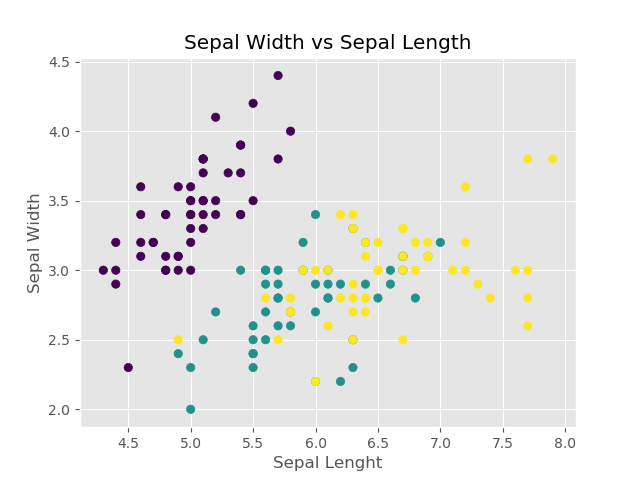

In [30]:
# Dispersão dos dados de Sepal Widh e Sepal Length
%matplotlib notebook
from matplotlib import style

style.use('ggplot')
plt.xlabel('Sepal Lenght')
plt.ylabel('Sepal Width')
plt.title('Sepal Width vs Sepal Length')
plt.scatter(train[:,0], train[:,1], c=target)

Plota a dispersão dos dados das features **Petal Width** e **Petal Length**.

<IPython.core.display.Javascript object>


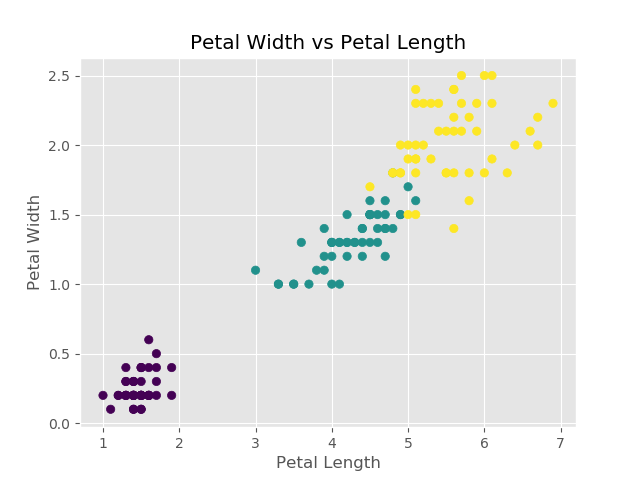

In [32]:
%matplotlib notebook

style.use('ggplot')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Width vs Petal Length')
plt.scatter(train[:,2], train[:,3], c=target)

### Aplicando o SVM
- Utilizando o SVM para classificar as flores usando a base Iris

Criando os datasets de treino e test

In [12]:
# Serão utilizandos 80% dos dados para treino (120 amostras) e 20% para teste(30 amostras)
X_train, X_test, y_train, y_test = train[:-30], train[-30:], target[:-30], target[-30:]

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

Treinando o algoritmo SVM

In [31]:
clf = svm.SVC()
clf.fit(X_train, y_train)

C:\Users\edubr\Anaconda3\envs\data-science\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Predizendo as classes das flores do dataframe X_test

In [16]:
y_pred = clf.predict(X_test)
y_pred

array([2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

### Validando o modelo SVM

Visualizando os Resultados da Classificação

Gráfico de dispersão entre as colunas **Sepal Length** e **Sepal Width** com a classe.
- Pontos roxos = erros do classificador

<IPython.core.display.Javascript object>


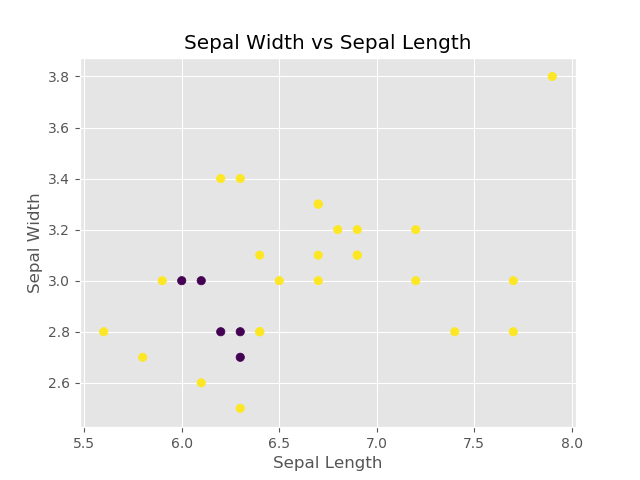

In [22]:
%matplotlib notebook

style.use('ggplot')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Width vs Sepal Length')
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

Gráfico de dispersão de **Petal Length**, **Petal Width** e a classe.
- Pontos roxos = erros do classificador

<IPython.core.display.Javascript object>


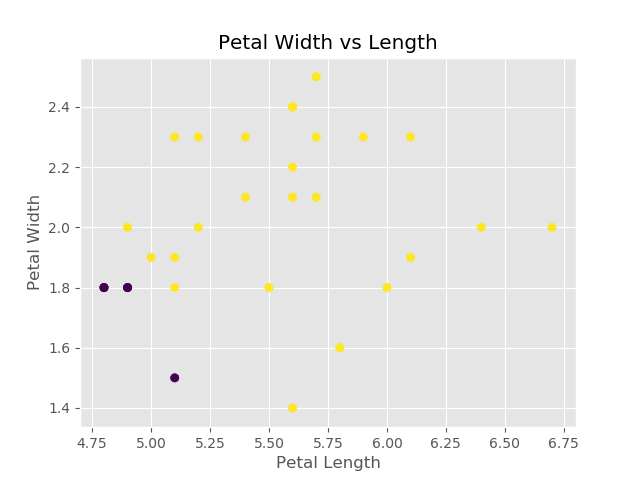

In [33]:
%matplotlib notebook

style.use('ggplot')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Width vs Length')
plt.scatter(X_test[:,2], X_test[:,3], c=y_pred)

Gráfico de instâncias e predições destas

<IPython.core.display.Javascript object>


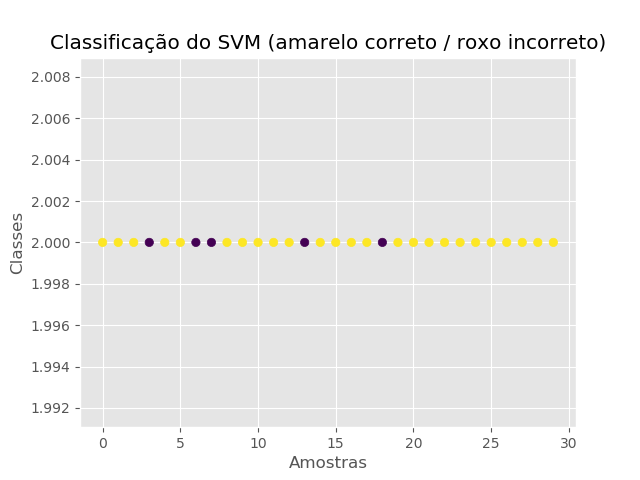

In [19]:
%matplotlib notebook

style.use('ggplot')
plt.xlabel('Amostras')
plt.ylabel('Classes')
plt.title('Classificação do SVM (amarelo correto / roxo incorreto)')
plt.scatter(range(len(y_test)), y_test, c=y_pred)

### Matriz de Confusão

Com a matriz de confusão é possível quantificar a performance do classificador por classe.

In [26]:
pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins = True)

Predito,1,2,All
Real,,,
2,5,25,30
All,5,25,30


### Cross Validation (CV)

In [39]:
resultados = cross_val_predict(clf, train, target, cv=10)
valor_classes = [0,1,2]
print( metrics.classification_report(target, resultados, valor_classes) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

   micro avg       0.98      0.98      0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



C:\Users\edubr\Anaconda3\envs\data-science\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\edubr\Anaconda3\envs\data-science\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\edubr\Anaconda3\envs\data-science\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\edubr\Anaconda3\